# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# import dataset

In [6]:
# showing data 
dataframe= pd.read_csv(r"C:\Users\jades\Downloads\election_results_2024.csv")
dataframe.head(5)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


# Data Overview

In [7]:
dataframe.shape

(542, 8)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        542 non-null    object
 1   Const. No.          542 non-null    int64 
 2   Leading Candidate   542 non-null    object
 3   Leading Party       542 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              542 non-null    int64 
 7   Status              542 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.0+ KB


In [9]:
dataframe.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

In [10]:
dataframe.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

# Summary Statistics

In [11]:
dataframe.describe()

,Const. No.,Margin
count,542.000000,5.420000e+02
mean,18.167897,1.623501e+05
std,16.441108,1.472628e+05
min,1.000000,4.800000e+01
25%,6.000000,5.895675e+04
50%,14.000000,1.222660e+05
75%,25.000000,2.229720e+05
max,80.000000,1.175092e+06


# Exploratory Data Analyis

# Party with highest and lowest margin of victory

In [12]:
party_votes=dataframe.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

dataframe['Margin']=pd.to_numeric(dataframe['Margin'], errors='coerce')
#party with highest and Lowest margin of victory
highest_margin= dataframe.loc[dataframe['Margin'].idxmax()]
lowest_margin= dataframe.loc[dataframe['Margin'].idxmin()]


# Plot number of seats won by each party

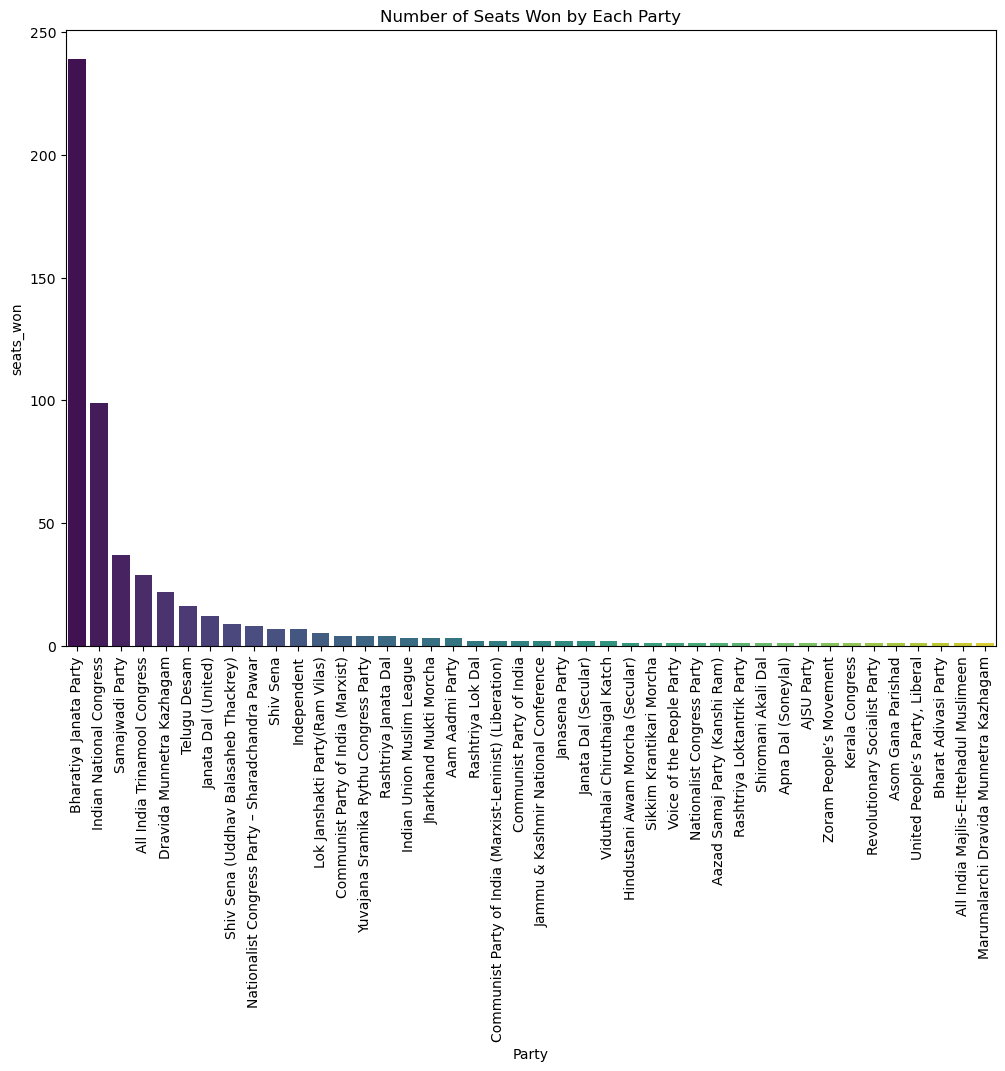

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Find the party with the highest and lowest votes
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()

# Number of seats won by each party
seats_won = dataframe['Leading Party'].value_counts()
# Plot number of seats won by each party
plt.figure(figsize=(12, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title("Number of Seats Won by Each Party")
plt.xlabel('Party')
plt.ylabel('seats_won')
plt.xticks(rotation=90)
plt.show()


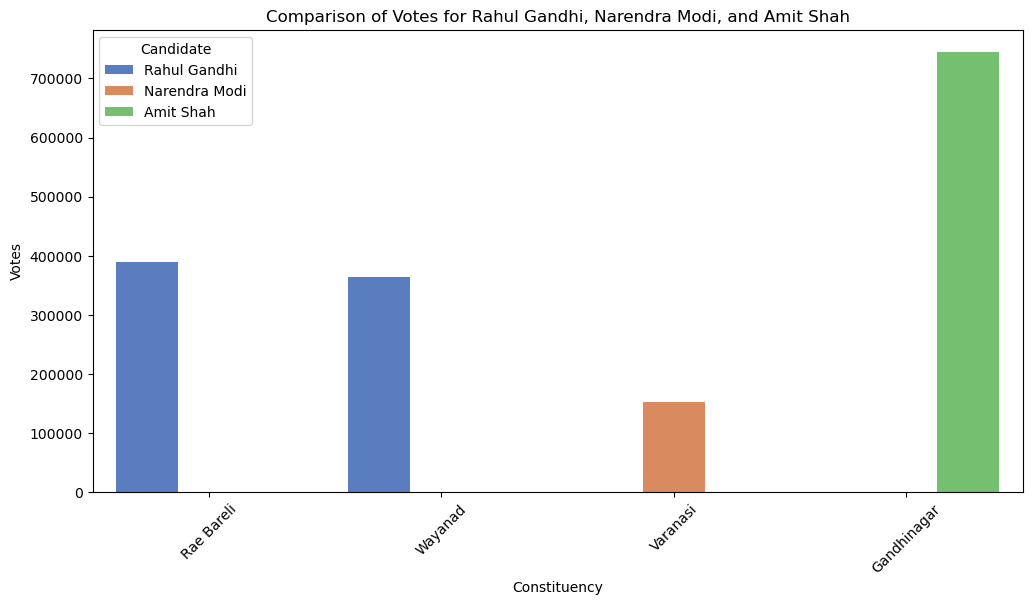

In [21]:
rahul_entries = dataframe[dataframe['Leading Candidate'] == 'RAHUL GANDHI']

modi_entries = dataframe[dataframe['Leading Candidate'] == 'NARENDRA MODI']

amit_entries = dataframe[dataframe['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

# Highest and lowest Victory Candidate

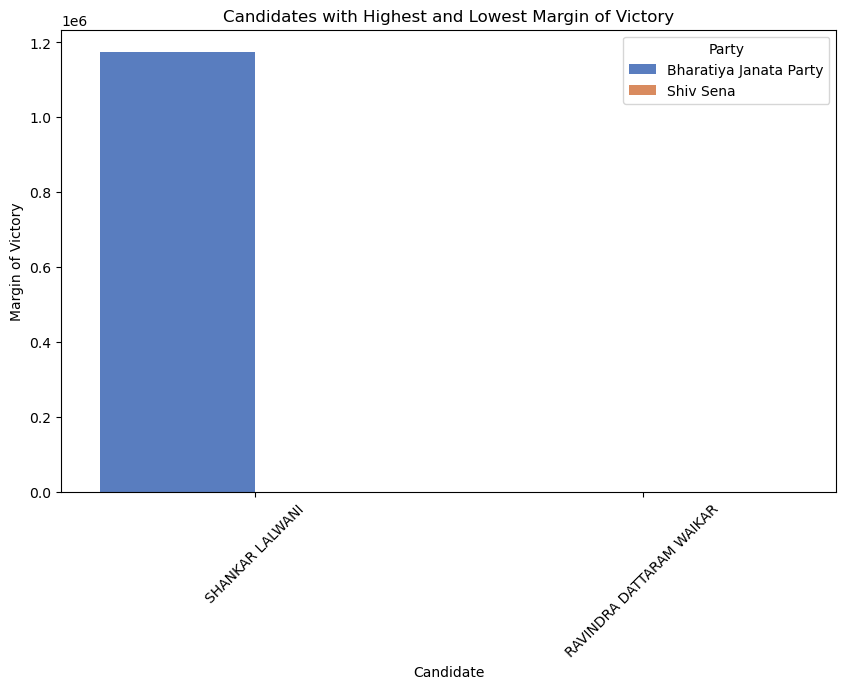

In [22]:
highest_margin_entry = dataframe.loc[dataframe['Margin'].idxmax()]
lowest_margin_entry = dataframe.loc[dataframe['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

C:\Users\jades\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


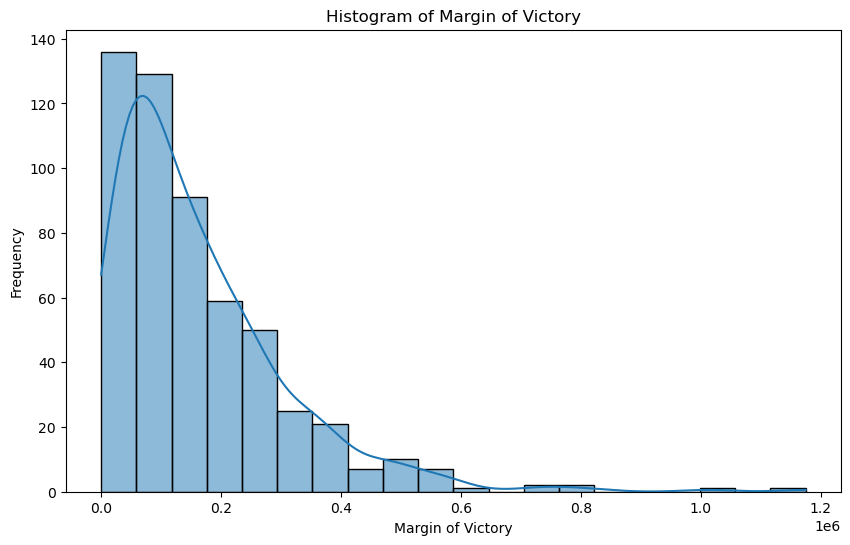

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(dataframe['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

# Votes distribution by party

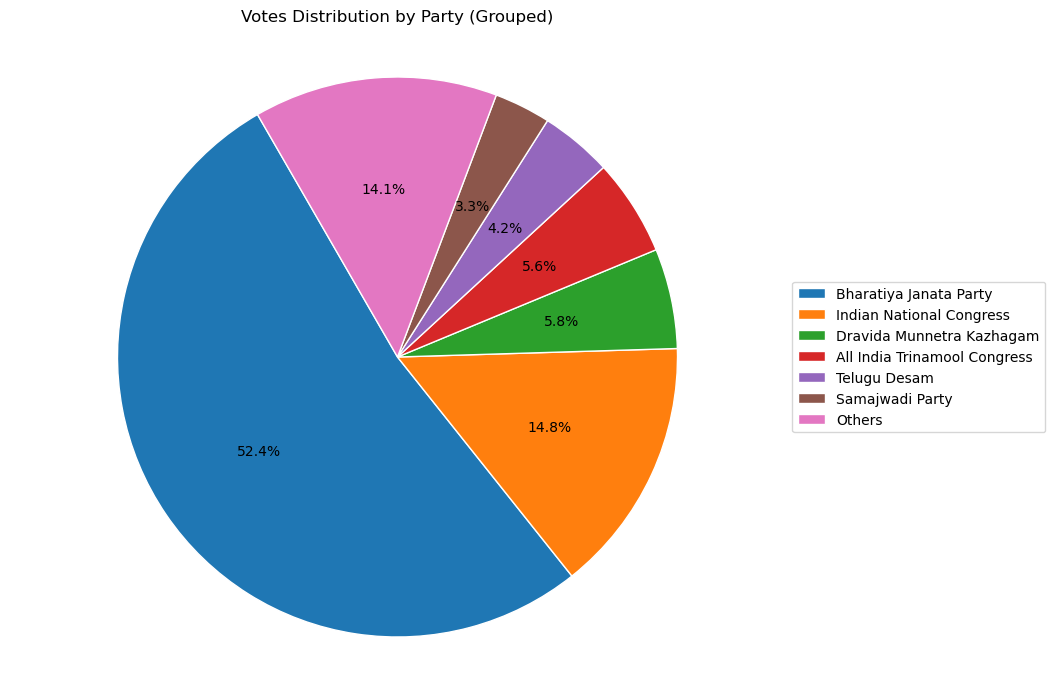

In [24]:
# Set a threshold for grouping small parties
threshold = 0.02  # 2%

# Calculate the total margin
total_margin = party_votes.sum()

# Filter out small parties
large_parties = party_votes[party_votes / total_margin >= threshold]
small_parties = party_votes[party_votes / total_margin < threshold]

# Sum small parties into 'Others'
party_votes_grouped = large_parties.copy()
party_votes_grouped['Others'] = small_parties.sum()

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    party_votes_grouped, 
    autopct='%1.1f%%', 
    startangle=120, 
    wedgeprops=dict(edgecolor='w')
)

# Set title and make sure pie chart is a circle
plt.title('Votes Distribution by Party (Grouped)', pad=20)
plt.axis('equal')

# Add legend
plt.legend(labels=party_votes_grouped.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')

# Show the chart
plt.show()


#  Plot votes distribution by trailing party

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

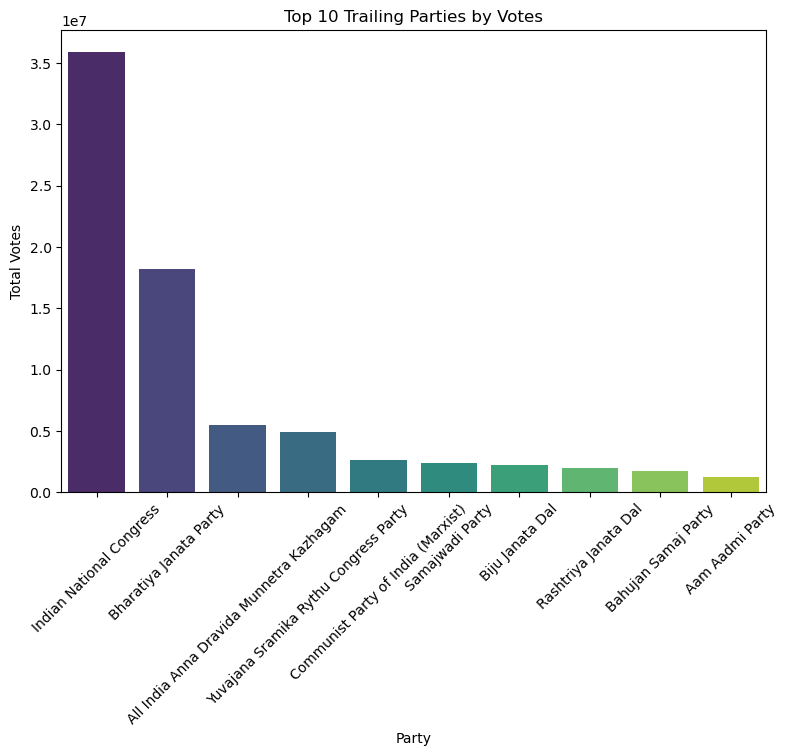

In [25]:
trailing_party_votes = dataframe.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = dataframe['Trailing Party'].value_counts()
plt.figure(figsize=(20, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

# top  10 party

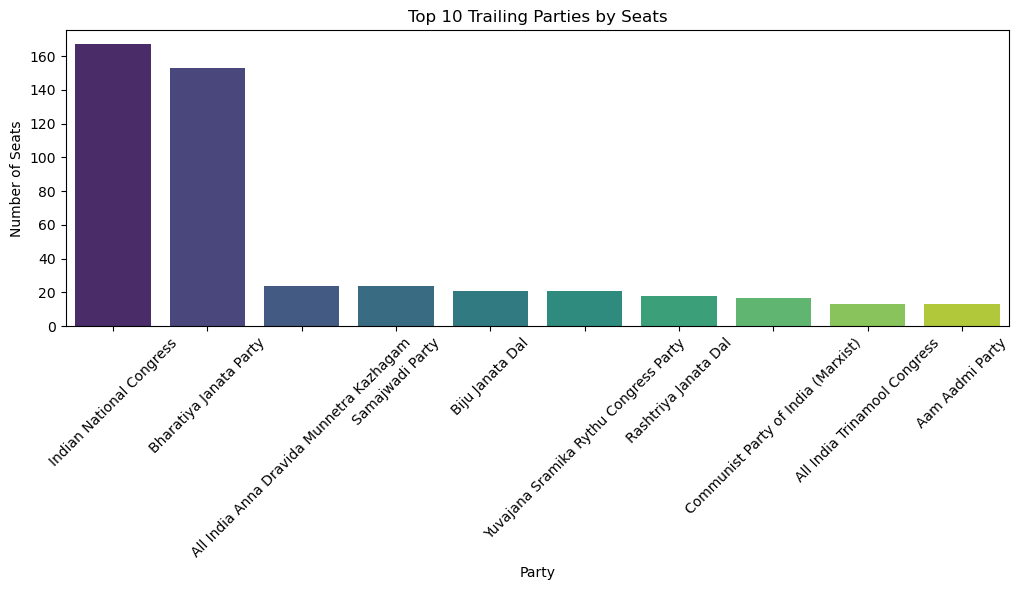

In [26]:
plt.figure(figsize=(20, 6))
# Plot votes distribution by trailing party
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
